In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data_frame=pd.read_csv('masterfile-US.csv')

In [27]:
data_frame.tail()

,Customer_Id,First_Name,Last_Name,Middle_Name,Age,Audio_Id,Audio_Name,Product_Id,Product_Name,Music_App,App_Id,Video_Id,Music_Label
145,CUSA1846,Emily,Alford,Luciano,26,AUS146,Jiggle Jiggle,P3,Iphone,Apple music,MA3,VUS046,Virgin Records
146,CUSA1847,Donna,Alimentato,NaN,49,AUS147,Me Porto Bonito,P3,Iphone,Apple music,MA3,VUS047,T-Series
147,CUSA1848,Michelle,Alldredge,NaN,23,AUS148,Beg For You,P3,Iphone,Apple music,MA3,VUS048,Virgin Records
148,CUSA1849,Carol,Allen,Jayde,29,AUS149,Beg For You,P3,Iphone,Apple music,MA3,VUS049,Virgin Records
149,CUSA1850,Amanda,Allen,Christopher Conley,47,AUS150,Despacito(Remix),P3,Iphone,Apple music,MA3,VUS050,T-Series


In [28]:
data_frame['Middle_Name'].fillna('No middle name',inplace=True)

In [29]:
data_frame['Music_Label'].fillna('Others',inplace=True)

In [30]:
data_frame['Video_Id'].fillna(0,inplace=True)

In [31]:
data_frame=data_frame.assign(Video_Id1=data_frame['Video_Id'])

In [32]:
data_frame.loc[data_frame['Video_Id1']!=0,'Video_Id1']=1

In [33]:
data_frame['Video_Id1']=data_frame['Video_Id1'].replace(0,'Video_Id not assigned')


In [34]:
data_frame['Video_Id1']=data_frame['Video_Id1'].replace(1,'Video_Id assigned')

In [35]:
data_frame=data_frame.assign(Age_Category=data_frame['Age'])

In [36]:
data_frame.loc[data_frame['Age_Category']>=18,'Age_Category']='18 and above years'

In [37]:
data_frame.loc[data_frame['Age_Category']!='18 and above years','Age_Category']='Under 18'

Text(0.5, 1.0, 'Customers using video services according to age group [US] ')

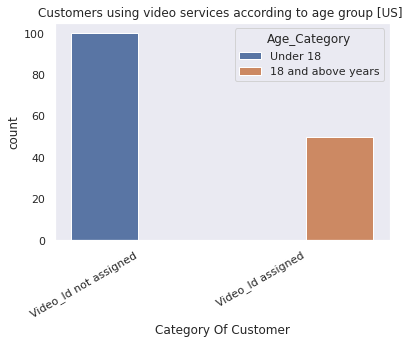

In [38]:
sns.set(style='dark')
sns.countplot(x=data_frame['Video_Id1'],hue=data_frame['Age_Category'])
plt.xticks(rotation=30,horizontalalignment='right')

plt.xlabel("Category Of Customer")
plt.title("Customers using video services according to age group [US] ")

In [39]:
aud=data_frame['Audio_Name'].value_counts()[:5]

Text(0, 0.5, 'Count')

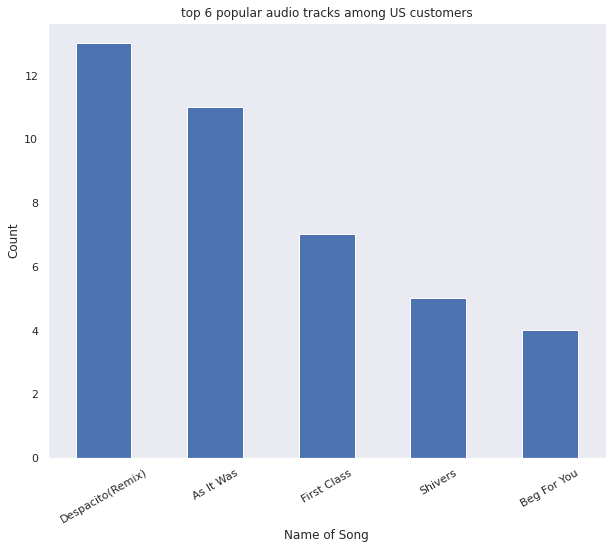

In [40]:
sns.set(style='dark')
aud.plot(kind='bar',figsize=(10,8))
plt.xticks(rotation=30,horizontalalignment='center')
plt.title("top 6 popular audio tracks among US customers")
plt.xlabel("Name of Song")
plt.ylabel("Count")

In [41]:
data_frame['Music_App'].value_counts()

Apple music      56
Spotify          54
Amazon music     24
Amazone music    16
Name: Music_App, dtype: int64

In [42]:
data_frame['Music_App']=data_frame['Music_App'].replace('Amazone music','Amazon music')

In [43]:
data_frame['Music_App'].value_counts()

Apple music     56
Spotify         54
Amazon music    40
Name: Music_App, dtype: int64

In [44]:
data_frame['Product_Name'].value_counts()

Iphone     69
Macbook    45
Ipad       36
Name: Product_Name, dtype: int64

Text(0, 0.5, 'Count')

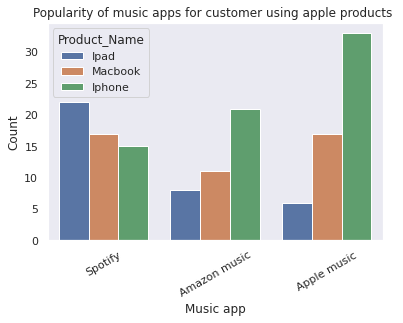

In [45]:
sns.set(style='dark')
plt.xticks(rotation=30,horizontalalignment='center')
sns.countplot(x=data_frame['Music_App'],hue=data_frame['Product_Name'])
plt.title("Popularity of music apps for customer using apple products ")
plt.xlabel("Music app")
plt.ylabel("Count")

In [46]:
la=data_frame['Music_Label'].value_counts()
la

Sony Music            46
Virgin Records        39
Warner music group    37
T-Series              28
Name: Music_Label, dtype: int64

In [47]:
la1=la.tolist()

In [48]:
la1

[46, 39, 37, 28]

In [49]:
la2=['Sony Music','Virgin Records','Warner music group','T-Series']

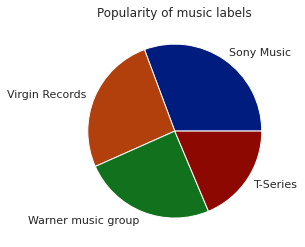

In [50]:
plt.title("Popularity of music labels")
plt.xticks(rotation=30,horizontalalignment='center')
palette=sns.color_palette('dark')
explode = [0.1, 0, 0, 0.1, 0.4]
plt.pie(la1,labels=la2,colors=palette)
plt.show()


Text(0, 0.5, 'Count')

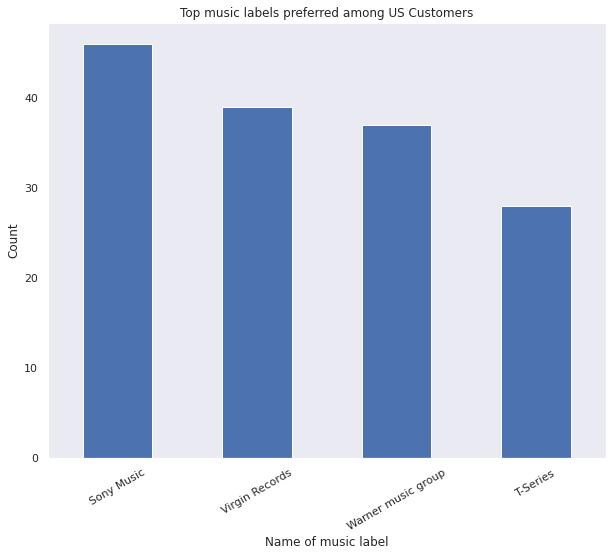

In [52]:
music_label=data_frame['Music_Label'].value_counts()
sns.set(style='dark')
music_label.plot(kind='bar',figsize=(10,8))
plt.xticks(rotation=30,horizontalalignment='center')
plt.title("Top music labels preferred among US Customers")
plt.xlabel("Name of music label")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

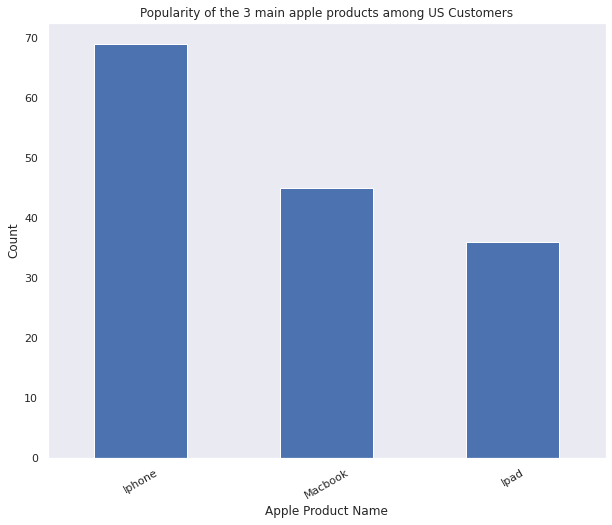

In [60]:
apple_products=data_frame['Product_Name'].value_counts()
sns.set(style='dark')
apple_products.plot(kind='bar',figsize=(10,8))
plt.xticks(rotation=30,horizontalalignment='center')
plt.title("Popularity of the 3 main apple products among US Customers")
plt.xlabel("Apple Product Name")
plt.ylabel("Count")

Text(0, 0.5, 'Number of customers')

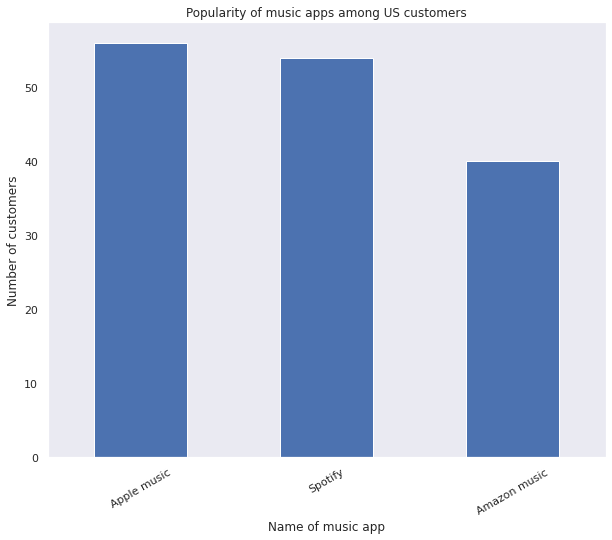

In [61]:
music_app=data_frame['Music_App'].value_counts()
sns.set(style='dark')
music_app.plot(kind='bar',figsize=(10,8))
plt.xticks(rotation=30,horizontalalignment='center')
plt.title("Popularity of music apps among US customers")
plt.xlabel("Name of music app")
plt.ylabel("Number of customers")

In [53]:
data_frame.head()

,Customer_Id,First_Name,Last_Name,Middle_Name,Age,Audio_Id,Audio_Name,Product_Id,Product_Name,Music_App,App_Id,Video_Id,Music_Label,Video_Id1,Age_Category
0,CUS01801,Ally,Aagaard,No middle name,17,AUS001,Despacito(Remix),P1,Ipad,Spotify,MA2,0,Sony Music,Video_Id not assigned,Under 18
1,CUS01802,Alex,Abadi,No middle name,17,AUS002,Rap God,P2,Macbook,Spotify,MA2,0,Sony Music,Video_Id not assigned,Under 18
2,CUS01803,Lyla,Abbatiello,Nicole,17,AUS003,Wap,P2,Macbook,Spotify,MA2,0,Sony Music,Video_Id not assigned,Under 18
3,CUS01804,Kylia,Abbott,Elixabeth,16,AUS004,Shape Of You,P2,Macbook,Spotify,MA2,0,Warner music group,Video_Id not assigned,Under 18
4,CUS01805,Bryce,Abbott,No middle name,15,AUS005,First Class,P1,Ipad,Spotify,MA2,0,Warner music group,Video_Id not assigned,Under 18


Text(0.5, 1.0, 'Product name by age')

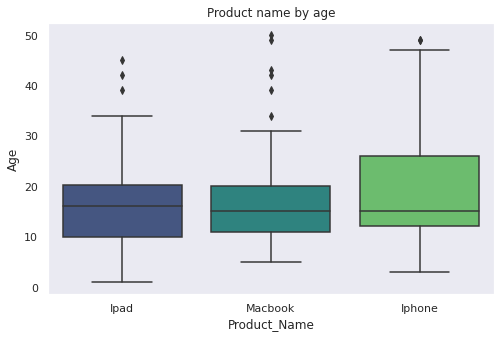

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data_frame['Product_Name'],y=data_frame['Age'],data=data_frame, palette='viridis')
plt.title("Product name by age")

Text(0.5, 1.0, 'Average age each of music app users')

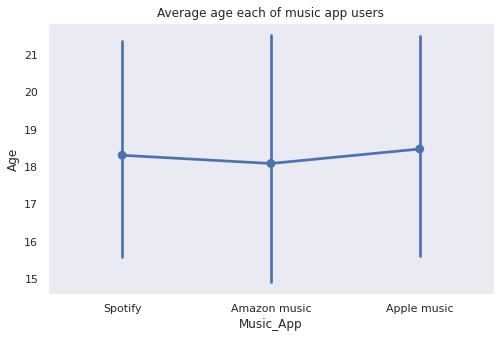

In [55]:
plt.figure(figsize=(8,5))
sns.pointplot(x=data_frame['Music_App'],y=data_frame['Age'],data=data_frame)
plt.title("Average age each of music app users")

Text(0.5, 1.0, 'Average age of each  Product users')

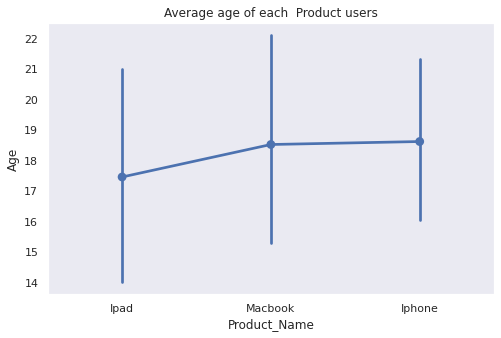

In [56]:
plt.figure(figsize=(8,5))
sns.pointplot(x=data_frame['Product_Name'],y=data_frame['Age'],data=data_frame)
plt.title("Average age of each  Product users")

Text(0.5, 1.0, 'Product name by age seperated by Music Label')

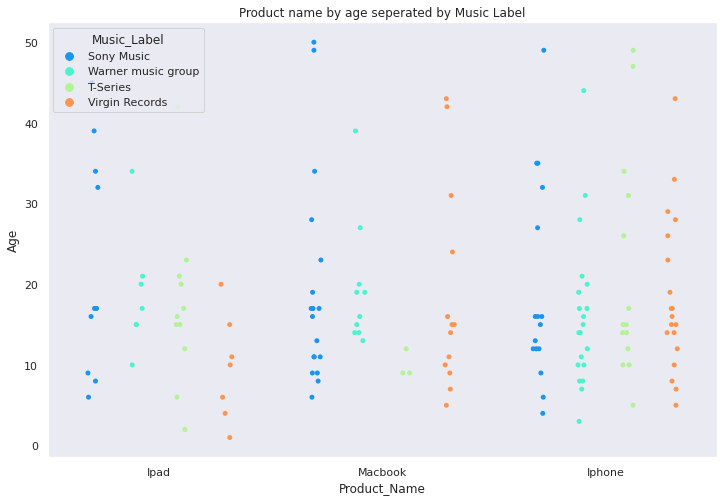

In [57]:
plt.figure(figsize=(12,8))
sns.stripplot(x='Product_Name', y='Age', data=data_frame, jitter=True, hue='Music_Label', dodge=True, palette='rainbow')
plt.title("Product name by age seperated by Music Label")

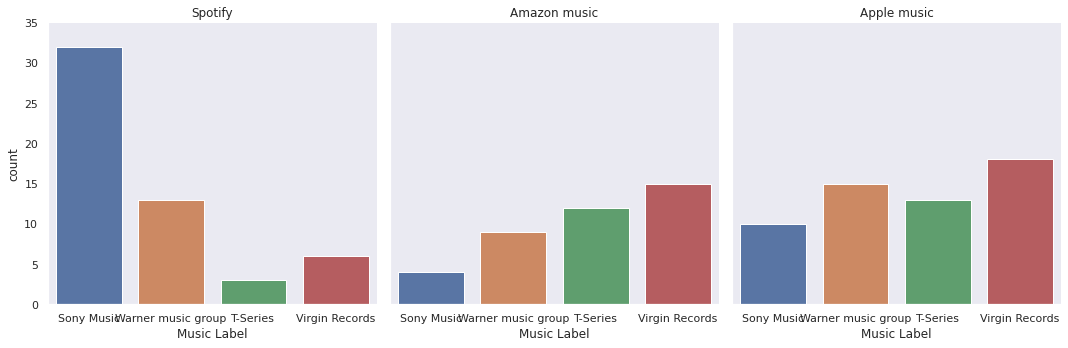

In [59]:
g = sns.catplot(x='Music_Label',col ='Music_App',data=data_frame,kind='count', aspect=1)
                
(g.set_axis_labels("Music Label")
  .set_titles("{col_name}")
  .set(ylim=(0,35)))
plt.tight_layout()
plt.savefig('seaborn_catplot.png', dpi=1000)